In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,5)
sns.set_style("whitegrid")

In [13]:
pf_filled = pd.read_csv('C:/Users/vidis/OneDrive/Desktop/Spring23/BachelorProject/pf_filled.csv')
cf_filled = pd.read_csv('C:/Users/vidis/OneDrive/Desktop/Spring23/BachelorProject/cf_filled.csv')
df = pf_filled.merge(cf_filled)
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time',inplace=True)

In [3]:
tf = pd.DataFrame()
for house in ['k28','h16','h22','h28','h32']:
    prod_str = 'prod_'+str(house)
    cons_str = 'cons_'+str(house)
    tf[house] = df[prod_str]-df[cons_str]

tf['Time'] = pd.to_datetime(df.index)
tf.set_index('Time',inplace=True)

In [4]:
tf

k28   h16   h22  h28   h32
Time                                            
2020-12-22 00:00:00  -5.0  -6.3  -6.3 -4.9  -6.6
2020-12-22 01:00:00  -4.3  -4.8  -6.5 -4.4  -5.4
2020-12-22 02:00:00  -4.0  -4.8  -4.2 -3.8  -4.4
2020-12-22 03:00:00  -3.8  -4.3  -3.3 -3.2  -3.7
2020-12-22 04:00:00  -3.1  -4.0  -3.1 -3.1  -3.4
...                   ...   ...   ...  ...   ...
2023-01-10 16:00:00 -10.6  -5.8  -5.9 -6.1  -5.9
2023-01-10 17:00:00  -6.1  -8.3  -8.4 -6.8  -9.6
2023-01-10 18:00:00  -9.7 -10.4 -17.1 -8.8 -13.5
2023-01-10 19:00:00  -9.4  -9.9 -12.3 -6.8 -11.7
2023-01-10 20:00:00  -7.7  -8.5 -14.8 -8.8 -17.0

[17997 rows x 5 columns]

## Find SSC values

In [65]:
def ssc(s):
    ssc_list = []
    for i in ['k28','h16','h22','h28','h32']:
        prod_str = 'prod_'+i
        num = s.loc[s[i]>0,i].sum()
        den = df[prod_str].sum()
        ssc_list.append([i, np.round(num/den*100,2)])
    ssc = pd.DataFrame(ssc_list,columns=['House','SSC'])
    return ssc

In [129]:
ssc_col(tf)

House    SSC
0   k28  26.56
1   h16  45.20
2   h22  40.92
3   h28  40.34
4   h32  26.63

## Seasonal SSC Values

In [5]:
sf = tf.copy()
sf['Hour'] = sf.index.hour
sf['Day_of_Week'] = sf.index.day_of_week
sf['Month'] = sf.index.month
sf['Year'] = sf.index.year

In [78]:
def ssc_seas(s,col_name):
    lst = []
    for i in s[col_name].unique():
        temp = s[s[col_name]==i]
        b = ssc(temp)
        for j in range(5):
            lst.append([i, b['House'][j],b['SSC'][j]])
    data = pd.DataFrame(lst,columns=['seas_ind','House','SSC'])
    return data

In [173]:
def ssc_plot(s,col_name):
    if col_name == None:
        #plt.bar(ssc(s)['House'],ssc(s)['SSC'],color=['tab:blue','tab:green','tab:red','tab:pink','tab:orange'],width=0.8)
        plt.plot(ssc(s)['House'],ssc(s)['SSC'],color='tab:purple')
        plt.ylabel('SSC %',fontsize=15)
        plt.xlabel('Houses',fontsize=15)
        plt.title('SCC % Plot for different Houses',fontsize=20)
        plt.ylim(0,100)
        plt.show()
    else:
        test = ssc_seas(s,col_name)

        for i in ['k28','h16','h22','h28','h32']:
            temp = test[test['House']==i].sort_values(['seas_ind'])
            plt.plot(temp['seas_ind'],temp['SSC'],label=i)

        plt.legend(bbox_to_anchor=[1.07,1.01])
        plt.ylabel('SSC %',fontsize=15)
        plt.xlabel('Seasonal Index',fontsize=15)
        plt.title('SSC % Plot with Seasonality: '+str(col_name),fontsize=20)
        plt.show()

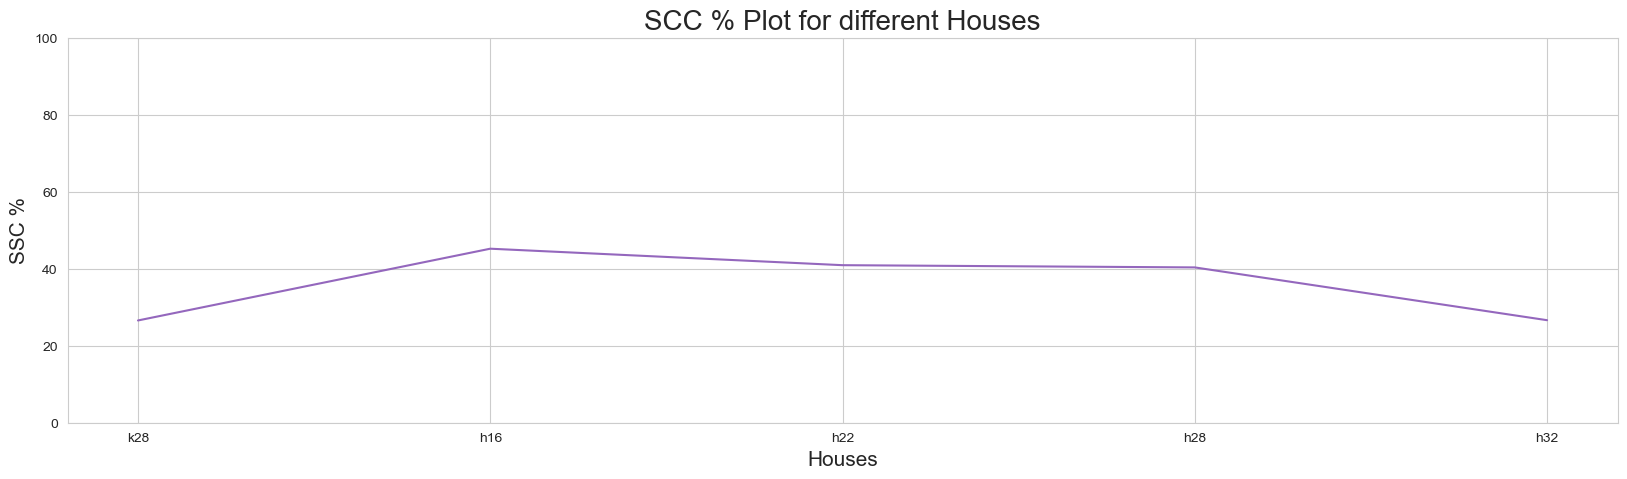

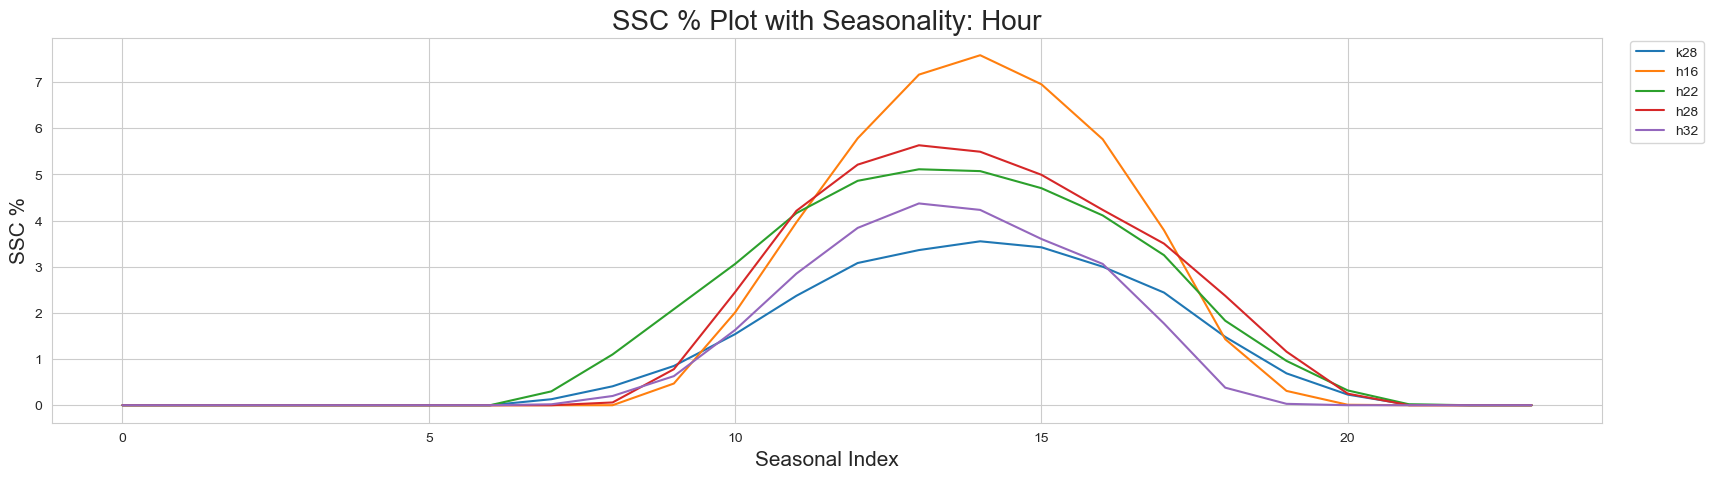

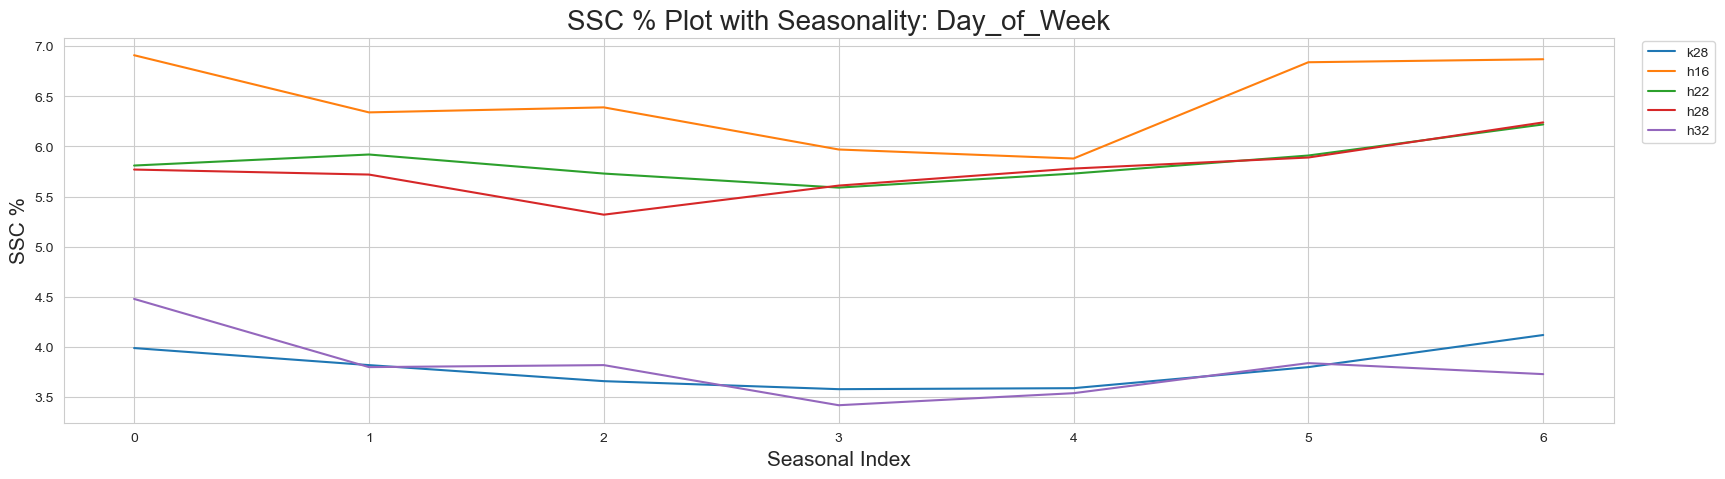

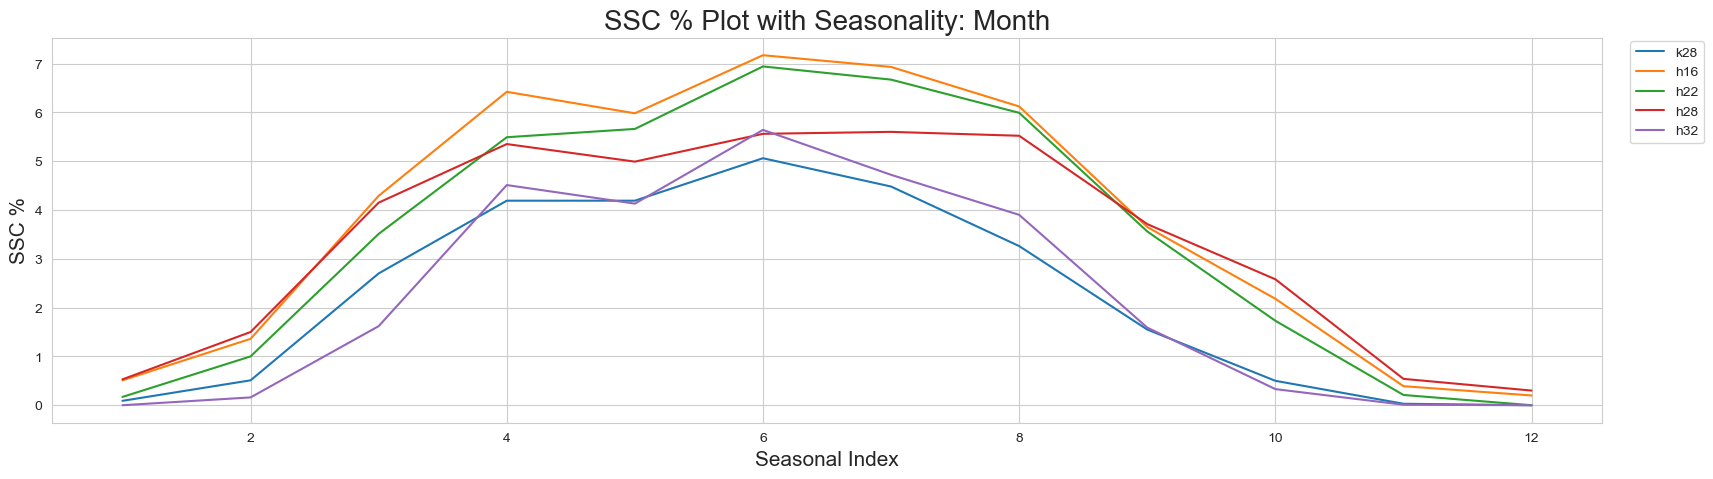

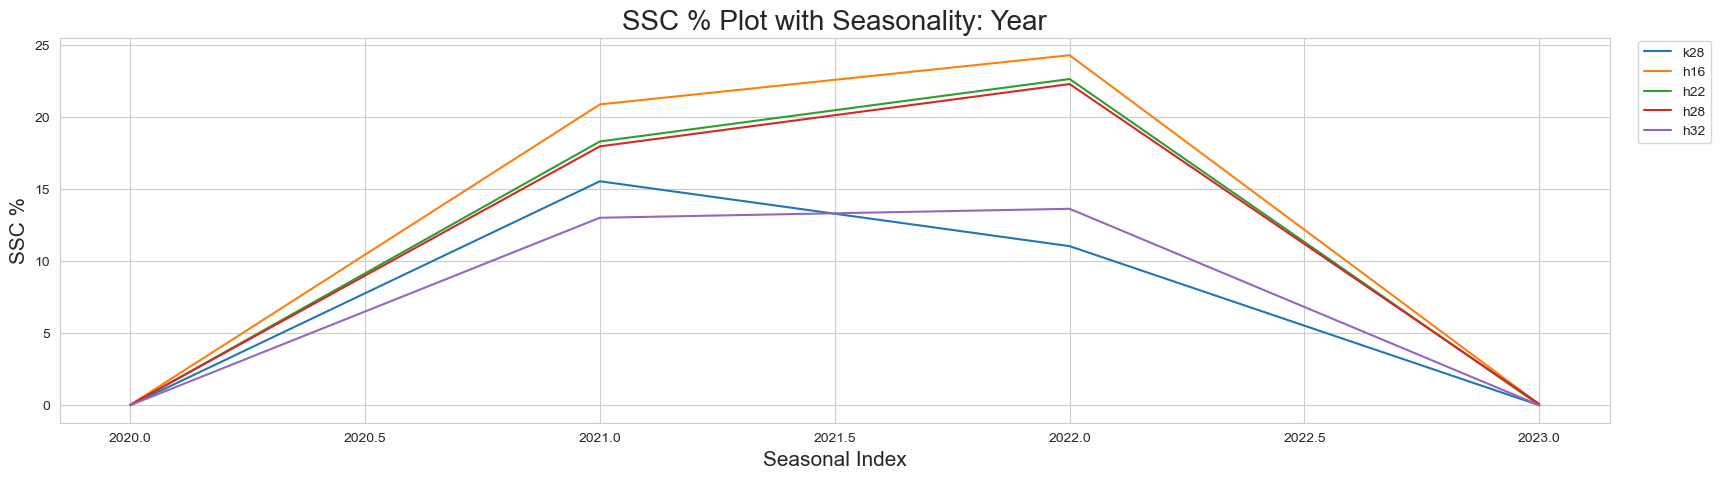

In [174]:
ssc_plot(sf,None)
ssc_plot(sf,'Hour')
ssc_plot(sf,'Day_of_Week')
ssc_plot(sf,'Month')
ssc_plot(sf,'Year')

## Plot SSC Graphs

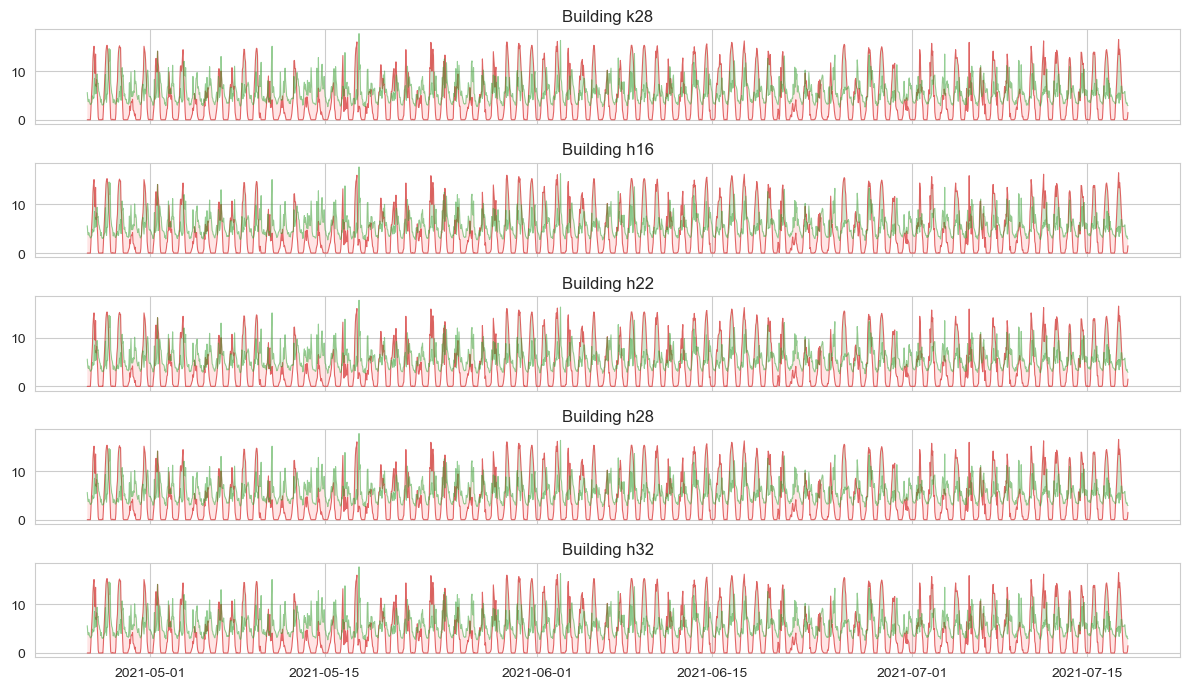

In [172]:
start_ind = 3000
end_ind = 5000

prod_str = 'prod_'+str(col)
cons_str = 'cons_'+str(col)

fig , ax = plt.subplots(5,1,figsize=(12,7),sharex=True)

for i, col in enumerate(['k28','h16','h22','h28','h32']):

    ax[i].plot(df[prod_str][start_ind:end_ind],color="tab:red", alpha=0.7,linewidth=0.8)
    ax[i].plot(df[cons_str][start_ind:end_ind],color="tab:green", alpha=0.5,linewidth=0.8)
    ax[i].fill_between(df.index[start_ind:end_ind], df[cons_str][start_ind:end_ind], df[prod_str][start_ind:end_ind], where=df[prod_str][start_ind:end_ind]>df[cons_str][start_ind:end_ind], facecolor='green', alpha=0.2)
    ax[i].fill_between(df.index[start_ind:end_ind], df[cons_str][start_ind:end_ind], df[prod_str][start_ind:end_ind], where=df[prod_str][start_ind:end_ind]<df[cons_str][start_ind:end_ind], facecolor='red', alpha=0.1)
    
    ax[i].set_title('Building '+str(col))

fig.tight_layout()
plt.show()